In [96]:
# ==== 1) Install & Import ====
!pip -q install kagglehub pandas pyarrow

import os
from pathlib import Path
import pandas as pd
import kagglehub

# ==== 2) Unduh dataset Kaggle ke folder lokal ====
# (Tidak perlu API token Kaggle)
DATASET = "jessemostipak/volcano-eruptions"
dataset_path = kagglehub.dataset_download(DATASET)
dataset_path = Path(dataset_path)
print("Dataset diunduh ke:", dataset_path)

# ==== 3) Lihat isi folder (cek nama file yang tersedia) ====
all_files = sorted([p for p in dataset_path.rglob("*") if p.is_file()])
print("Jumlah file:", len(all_files))
for p in all_files[:50]:  # tampilkan sampai 50 pertama
    print("-", p.relative_to(dataset_path))

# ==== 4) Helper: fungsi aman untuk load CSV jika ada ====
def load_csv_if_exists(folder: Path, filename: str):
    """Coba muat CSV bernama `filename` dari `folder`, kalau ada."""
    cand = folder / filename
    if cand.exists():
        df = pd.read_csv(cand)
        print(f"[OK] Loaded {filename} → shape={df.shape}")
        return df
    else:
        print(f"[SKIP] {filename} tidak ditemukan di dataset ini.")
        return None

# ==== 5) Muat tabel utama yang umum pada dataset ini ====
#   Catatan: nama file pada setiap dataset bisa beda.
#   Untuk dataset ini biasanya ada 'eruption.csv' / 'eruptions.csv', 'volcano.csv', dst.
eruptions = load_csv_if_exists(dataset_path, "eruptions.csv")
sulfur    = load_csv_if_exists(dataset_path, "sulfur.csv")
tree      = load_csv_if_exists(dataset_path, "tree_rings.csv")

# ==== 6) Contoh tampilan 5 baris pertama kalau ada ====
if eruptions is not None:
    display(eruptions.head())
if sulfur is not None:
    display(sulfur.head())
if tree is not None:
    display(tree.head())

Using Colab cache for faster access to the 'volcano-eruptions' dataset.
Dataset diunduh ke: /kaggle/input/volcano-eruptions
Jumlah file: 5
- eruptions.csv
- events.csv
- sulfur.csv
- tree_rings.csv
- volcano.csv
[OK] Loaded eruptions.csv → shape=(11178, 15)
[OK] Loaded sulfur.csv → shape=(2252, 3)
[OK] Loaded tree_rings.csv → shape=(2252, 3)


,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550


,year,neem,wdc
0,705.958,13.64,14.5850
1,705.875,14.40,12.8170
2,705.792,15.78,11.2710
3,705.708,17.42,9.8681
4,705.625,18.29,8.7793


,year,n_tree,europe_temp_index
0,2000.0,1.10,0.85
1,1999.0,0.39,0.79
2,1998.0,1.13,0.72
3,1997.0,0.97,0.87
4,1996.0,1.07,0.19


In [97]:
# ==== 7) Setup Library untuk Visualisasi ====
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya plot agar terlihat lebih modern
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [98]:
# ==== 8) Analisis Awal 'eruptions' ====
print("Informasi Dasar Dataset Erupsi:")
eruptions.info()

print("\nStatistik Deskriptif untuk Kolom Numerik:")
display(eruptions.describe())

Informasi Dasar Dataset Erupsi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longit

,volcano_number,eruption_number,vei,start_year,start_month,start_day,end_year,end_month,end_day,latitude,longitude
count,11178.000000,11178.000000,8272.000000,11177.000000,10985.000000,10982.000000,4332.000000,4329.000000,4326.000000,11178.000000,11178.000000
mean,300284.371176,15666.905439,1.947897,622.848260,3.450888,7.015025,1917.326639,6.220836,13.315996,16.865778,31.572377
std,52321.193203,3297.612433,1.161098,2482.174317,4.071419,9.645386,157.646408,3.686128,9.831282,30.761752,115.248384
min,210010.000000,10001.000000,0.000000,-11345.000000,0.000000,0.000000,-475.000000,0.000000,0.000000,-77.530000,-179.970000
25%,263310.000000,12817.250000,1.000000,680.000000,0.000000,0.000000,1895.000000,3.000000,4.000000,-6.102000,-77.656000
50%,290050.000000,15650.500000,2.000000,1847.000000,1.000000,0.000000,1957.000000,6.000000,15.000000,17.600000,55.708000
75%,343030.000000,18463.750000,2.000000,1950.000000,7.000000,15.000000,1992.000000,9.000000,21.000000,40.821000,139.394000
max,600000.000000,22355.000000,7.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,85.608000,179.580000


/tmp/ipython-input-3159200258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eruptions, x='vei', order=eruptions['vei'].value_counts().index, palette='viridis')


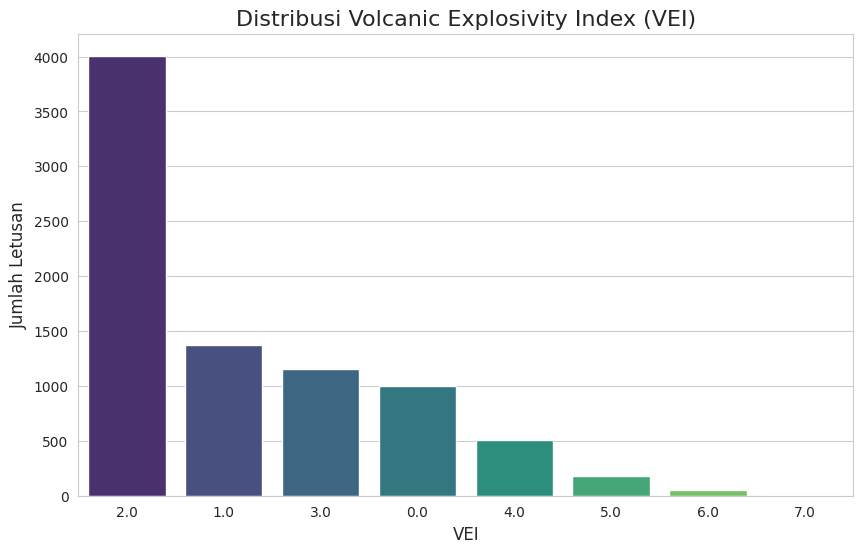

In [99]:
# ==== 9) Visualisasi Distribusi VEI ====
plt.figure(figsize=(10, 6))
sns.countplot(data=eruptions, x='vei', order=eruptions['vei'].value_counts().index, palette='viridis')
plt.title('Distribusi Volcanic Explosivity Index (VEI)', fontsize=16)
plt.xlabel('VEI', fontsize=12)
plt.ylabel('Jumlah Letusan', fontsize=12)
plt.show()

In [100]:
# ==== 10) Analisis Awal dan Agregasi 'sulfur' ====
print("Informasi Dasar Dataset Sulfur:")
sulfur.info()

# Ubah 'year' menjadi integer dan agregasi per tahun
# Tangani nilai NaN dengan menghapus baris yang memiliki NaN di kolom 'year'
sulfur_cleaned = sulfur.dropna(subset=['year'])
sulfur_cleaned['year_int'] = sulfur_cleaned['year'].astype(int)
sulfur_agg = sulfur_cleaned.groupby('year_int')[['neem', 'wdc']].mean().reset_index()

print("\nContoh data sulfur setelah diagregasi per tahun:")
display(sulfur_agg.head())

Informasi Dasar Dataset Sulfur:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1962 non-null   float64
 1   neem    1962 non-null   float64
 2   wdc     2252 non-null   float64
dtypes: float64(3)
memory usage: 52.9 KB

Contoh data sulfur setelah diagregasi per tahun:


/tmp/ipython-input-2862558184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sulfur_cleaned['year_int'] = sulfur_cleaned['year'].astype(int)


,year_int,neem,wdc
0,500,19.736000,10.591900
1,501,25.371000,12.874840
2,502,29.934167,13.521000
3,503,14.707500,13.349042
4,504,16.040833,18.880750


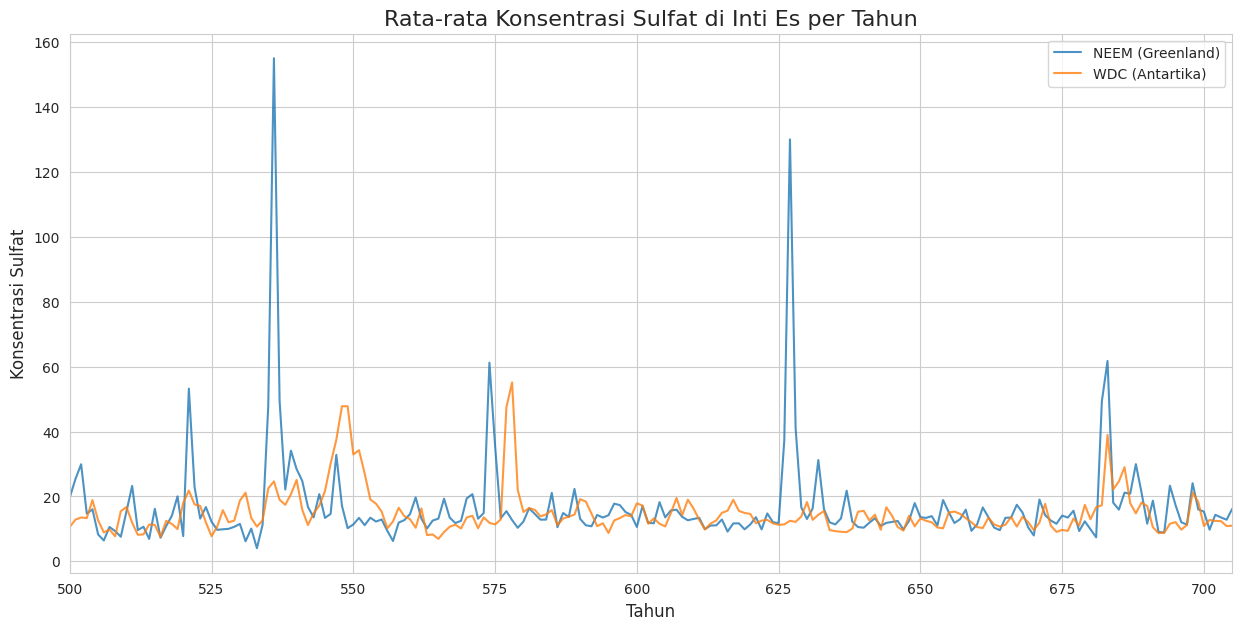

In [101]:
# ==== 11) Visualisasi Time Series Sulfur ====
plt.figure(figsize=(15, 7))
plt.plot(sulfur_agg['year_int'], sulfur_agg['neem'], label='NEEM (Greenland)', alpha=0.8)
plt.plot(sulfur_agg['year_int'], sulfur_agg['wdc'], label='WDC (Antartika)', alpha=0.8)
plt.title('Rata-rata Konsentrasi Sulfat di Inti Es per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Konsentrasi Sulfat', fontsize=12)
plt.legend()
plt.xlim(sulfur_agg['year_int'].min(), sulfur_agg['year_int'].max()) # Atur batas sumbu x
plt.show()

Informasi Dasar Dataset Cincin Pohon (Temperatur):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2000 non-null   float64
 1   n_tree             2000 non-null   float64
 2   europe_temp_index  2000 non-null   float64
dtypes: float64(3)
memory usage: 52.9 KB


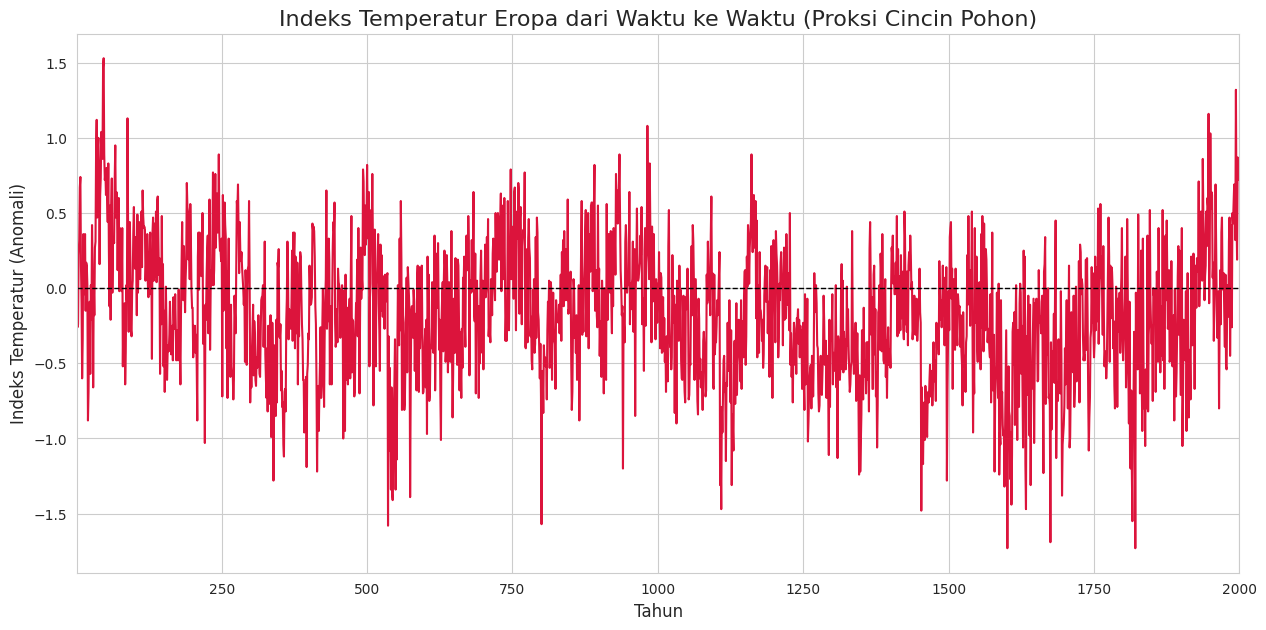

In [102]:
# ==== 12) Analisis dan Visualisasi 'tree' ====
print("Informasi Dasar Dataset Cincin Pohon (Temperatur):")
tree.info()

plt.figure(figsize=(15, 7))
plt.plot(tree['year'], tree['europe_temp_index'], color='crimson')
plt.axhline(0, color='black', linestyle='--', lw=1) # Garis nol sebagai referensi
plt.title('Indeks Temperatur Eropa dari Waktu ke Waktu (Proksi Cincin Pohon)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Indeks Temperatur (Anomali)', fontsize=12)
plt.xlim(tree['year'].min(), tree['year'].max())
plt.show()

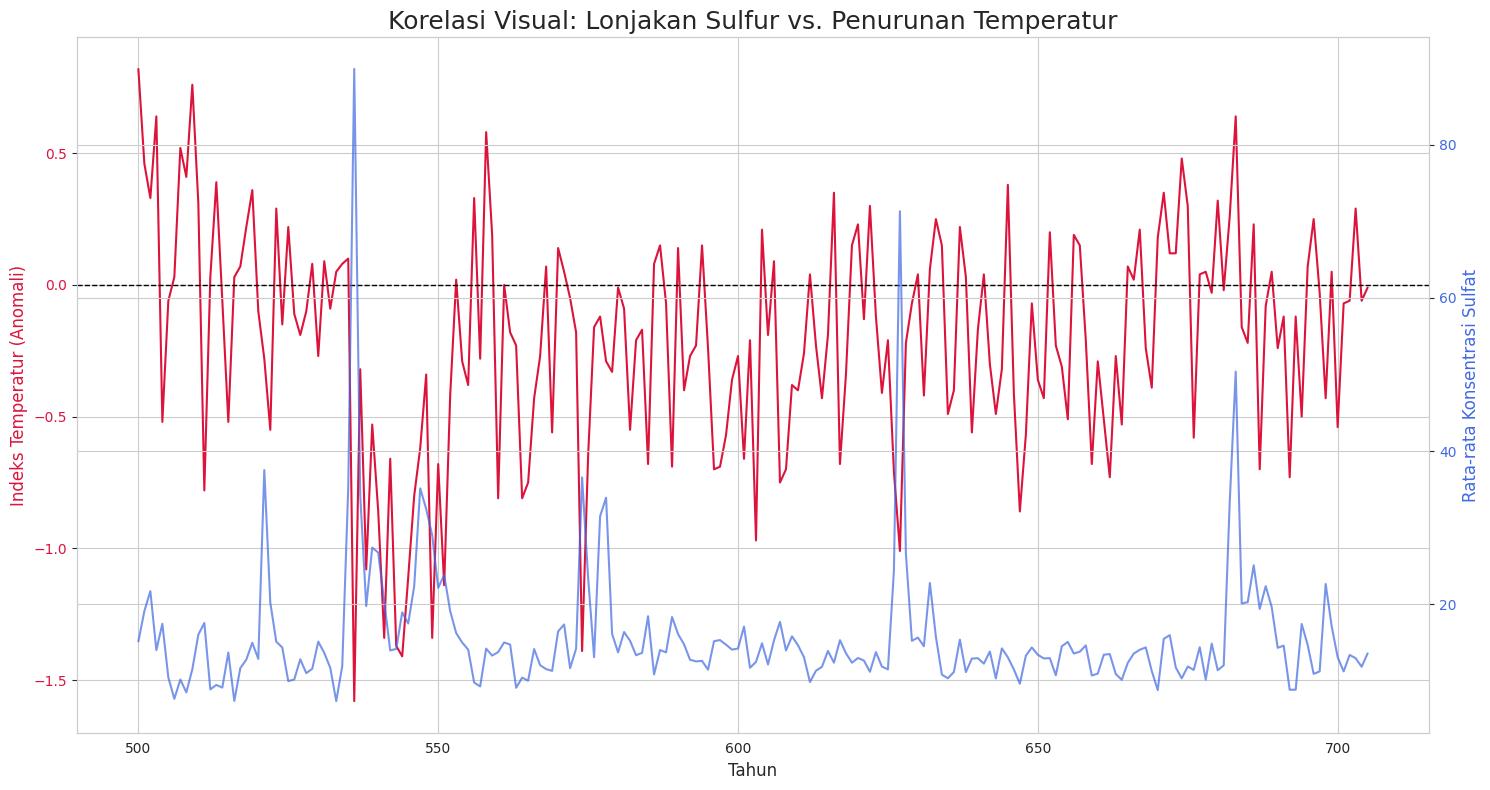

In [103]:
# ==== 13) Visualisasi Gabungan Sulfur vs. Temperatur ====

# Gabungkan data sulfur dan tree yang sudah diagregasi untuk plot
plot_df = pd.merge(sulfur_agg, tree, left_on='year_int', right_on='year', how='inner')

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Temperatur (Sumbu Y kiri)
ax1.plot(plot_df['year'], plot_df['europe_temp_index'], color='crimson', label='Indeks Temperatur')
ax1.set_xlabel('Tahun', fontsize=12)
ax1.set_ylabel('Indeks Temperatur (Anomali)', color='crimson', fontsize=12)
ax1.tick_params(axis='y', labelcolor='crimson')
ax1.axhline(0, color='black', linestyle='--', lw=1)

# Buat sumbu Y kedua yang berbagi sumbu X yang sama
ax2 = ax1.twinx()

# Plot Sulfur (Sumbu Y kanan)
# Kita buat fitur 'avg_sulfur' untuk plot
plot_df['avg_sulfur'] = plot_df[['neem', 'wdc']].mean(axis=1)
ax2.plot(plot_df['year'], plot_df['avg_sulfur'], color='royalblue', label='Rata-rata Sulfur', alpha=0.7)
ax2.set_ylabel('Rata-rata Konsentrasi Sulfat', color='royalblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='royalblue')

# Judul dan legenda
plt.title('Korelasi Visual: Lonjakan Sulfur vs. Penurunan Temperatur', fontsize=18)
fig.tight_layout()
plt.show()

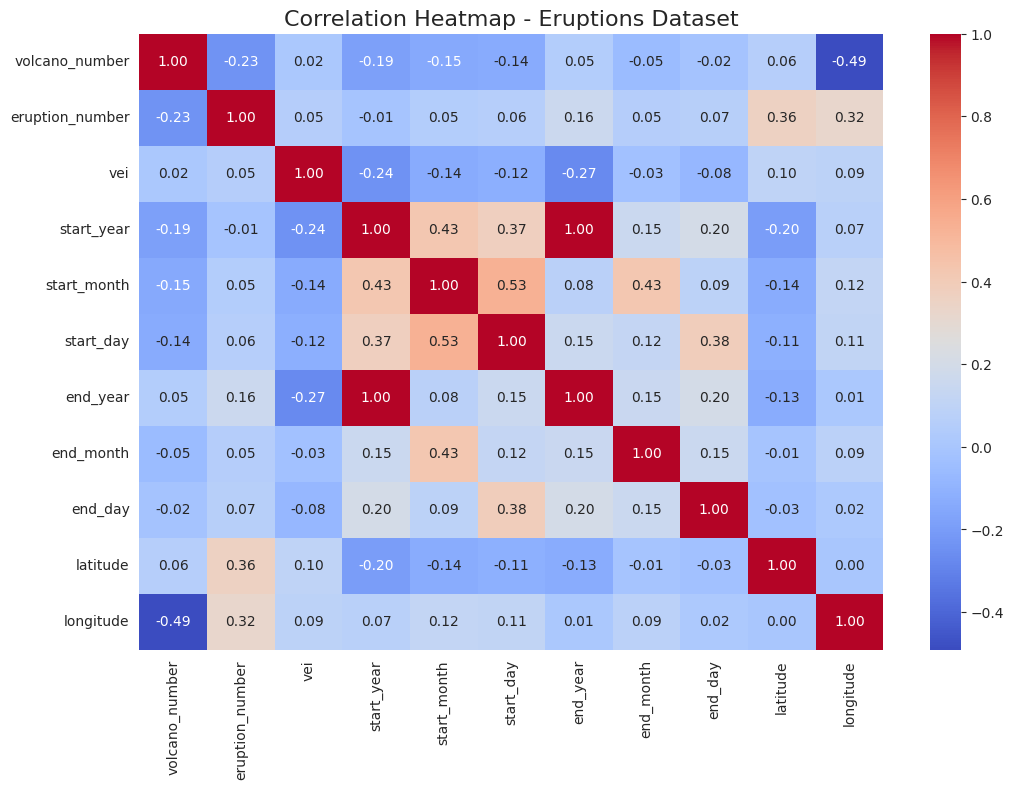

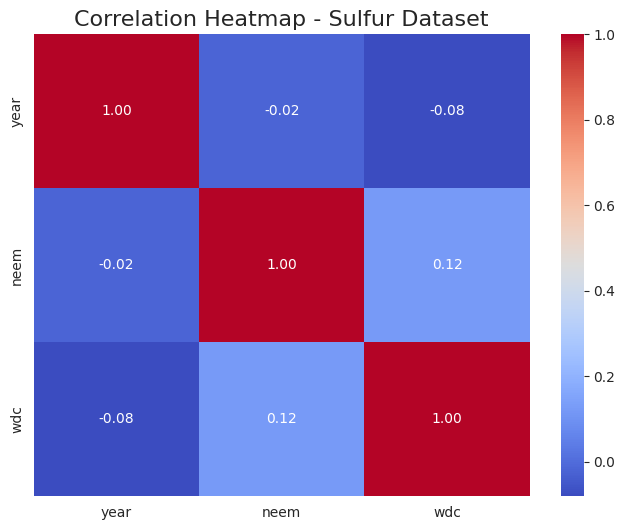

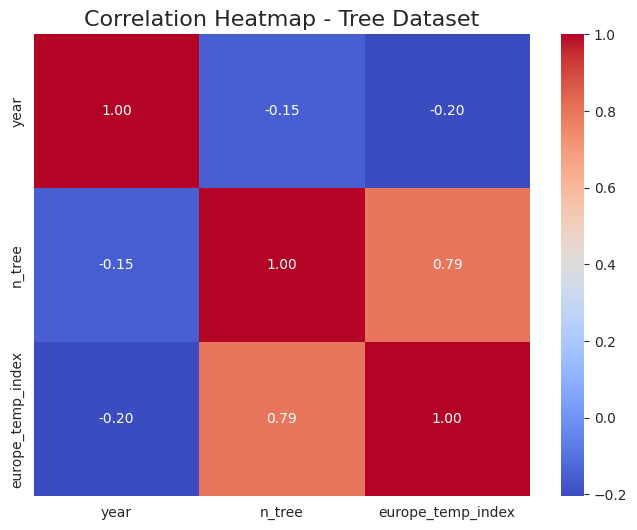

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi untuk setiap DataFrame
eruptions_corr = eruptions.select_dtypes(include=['float64', 'int64']).corr()
sulfur_corr = sulfur.select_dtypes(include=['float64', 'int64']).corr()
tree_corr = tree.select_dtypes(include=['float64', 'int64']).corr()

# Buat heatmap untuk eruptions
plt.figure(figsize=(12, 8))
sns.heatmap(eruptions_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Eruptions Dataset', fontsize=16)
plt.show()

# Buat heatmap untuk sulfur
plt.figure(figsize=(8, 6))
sns.heatmap(sulfur_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Sulfur Dataset', fontsize=16)
plt.show()

# Buat heatmap untuk tree
plt.figure(figsize=(8, 6))
sns.heatmap(tree_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Tree Dataset', fontsize=16)
plt.show()

# Task
Lanjutkan analisis data eksplorasi (EDA) pada dataset `eruptions`, `sulfur`, dan `tree` yang telah dimuat, termasuk visualisasi untuk memahami karakteristik dan hubungan antar data.

## Analisis ringkasan data

### Subtask:
Tampilkan ringkasan statistik dan informasi dasar (jumlah baris, kolom, tipe data, nilai yang hilang) untuk setiap DataFrame (`eruptions`, `sulfur`, dan `tree`).


**Reasoning**:
Display the basic information and descriptive statistics for each DataFrame using `.info()` and `.describe()`.



In [105]:
print("--- Info for eruptions DataFrame ---")
eruptions.info()
print("\n--- Describe for eruptions DataFrame ---")
display(eruptions.describe())

print("\n--- Info for sulfur DataFrame ---")
sulfur.info()
print("\n--- Describe for sulfur DataFrame ---")
display(sulfur.describe())

print("\n--- Info for tree DataFrame ---")
tree.info()
print("\n--- Describe for tree DataFrame ---")
display(tree.describe())

--- Info for eruptions DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  l

,volcano_number,eruption_number,vei,start_year,start_month,start_day,end_year,end_month,end_day,latitude,longitude
count,11178.000000,11178.000000,8272.000000,11177.000000,10985.000000,10982.000000,4332.000000,4329.000000,4326.000000,11178.000000,11178.000000
mean,300284.371176,15666.905439,1.947897,622.848260,3.450888,7.015025,1917.326639,6.220836,13.315996,16.865778,31.572377
std,52321.193203,3297.612433,1.161098,2482.174317,4.071419,9.645386,157.646408,3.686128,9.831282,30.761752,115.248384
min,210010.000000,10001.000000,0.000000,-11345.000000,0.000000,0.000000,-475.000000,0.000000,0.000000,-77.530000,-179.970000
25%,263310.000000,12817.250000,1.000000,680.000000,0.000000,0.000000,1895.000000,3.000000,4.000000,-6.102000,-77.656000
50%,290050.000000,15650.500000,2.000000,1847.000000,1.000000,0.000000,1957.000000,6.000000,15.000000,17.600000,55.708000
75%,343030.000000,18463.750000,2.000000,1950.000000,7.000000,15.000000,1992.000000,9.000000,21.000000,40.821000,139.394000
max,600000.000000,22355.000000,7.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,85.608000,179.580000



--- Info for sulfur DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1962 non-null   float64
 1   neem    1962 non-null   float64
 2   wdc     2252 non-null   float64
dtypes: float64(3)
memory usage: 52.9 KB

--- Describe for sulfur DataFrame ---


,year,neem,wdc
count,1962.000000,1962.000000,2252.000000
mean,620.409240,16.461794,14.122158
std,53.305166,14.229328,6.764665
min,500.042000,1.070000,3.745800
25%,581.895750,10.862500,10.258250
50%,623.583500,13.270000,12.805000
75%,665.021000,17.262500,16.110750
max,705.958000,170.600000,72.871000



--- Info for tree DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2000 non-null   float64
 1   n_tree             2000 non-null   float64
 2   europe_temp_index  2000 non-null   float64
dtypes: float64(3)
memory usage: 52.9 KB

--- Describe for tree DataFrame ---


,year,n_tree,europe_temp_index
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,-0.551175,-0.165005
std,577.494589,0.716904,0.446605
min,1.000000,-3.290000,-1.730000
25%,500.750000,-1.010000,-0.470000
50%,1000.500000,-0.530000,-0.160000
75%,1500.250000,-0.050000,0.130000
max,2000.000000,2.260000,1.530000


## Visualisasi distribusi erupsi

### Subtask:
Buat visualisasi untuk melihat distribusi erupsi berdasarkan kategori, VEI (Volcanic Explosivity Index), dan tahun.


**Reasoning**:
Calculate the distribution of eruption categories, VEI, and start years, and then create the corresponding bar plots and histogram.



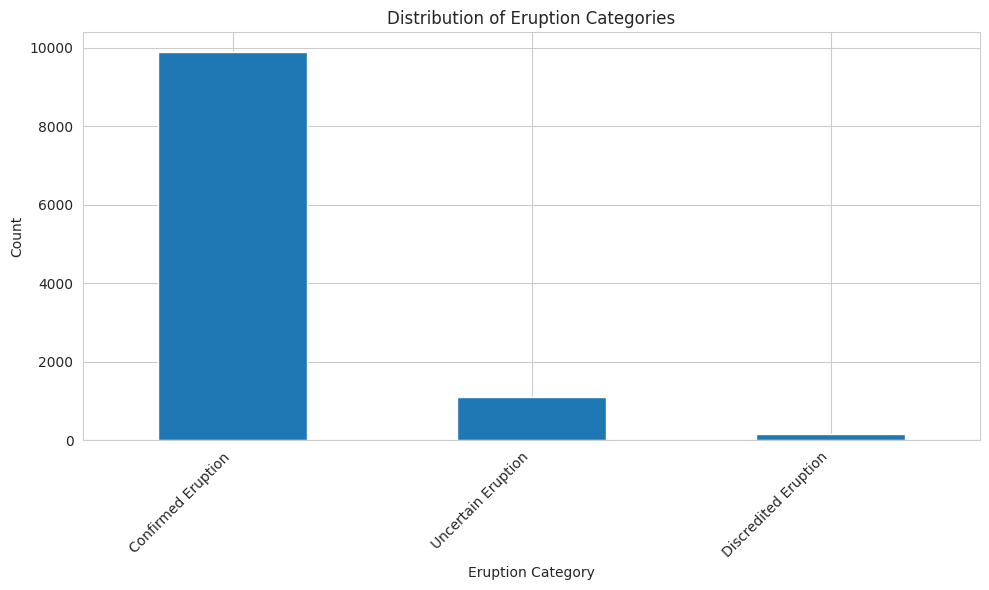

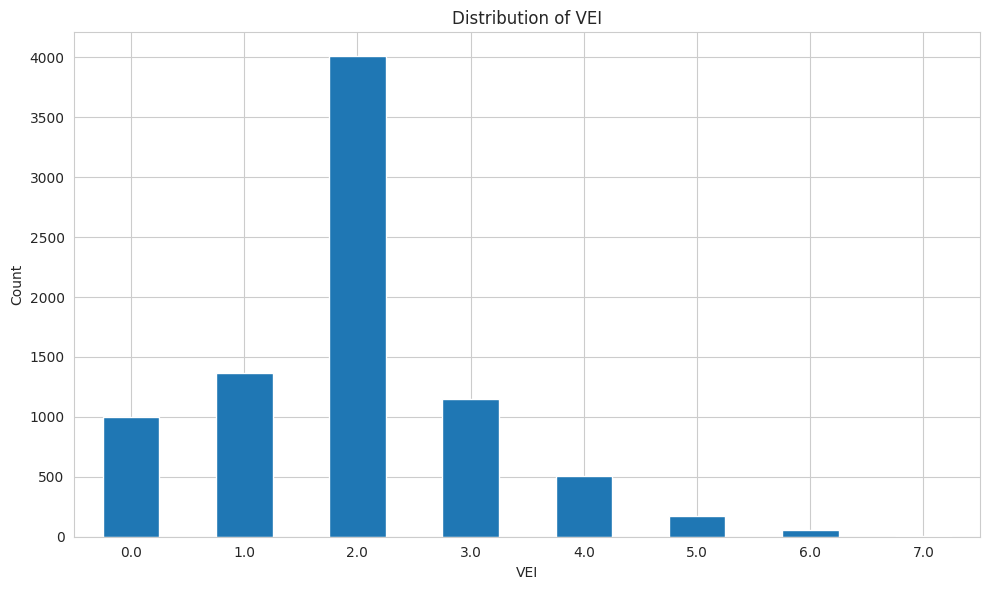

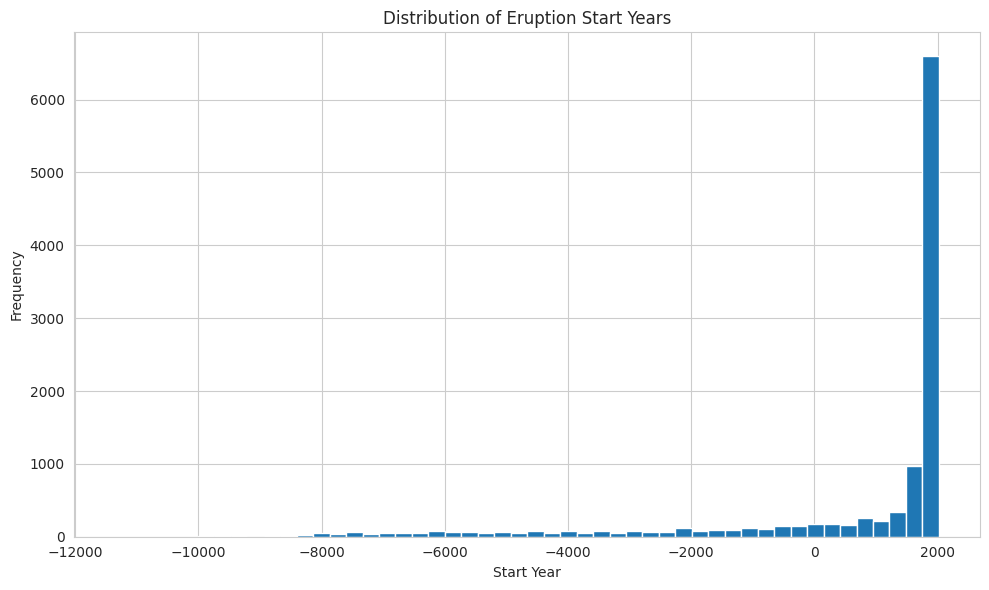

In [106]:
import matplotlib.pyplot as plt

# Step 1 & 2: Distribution of Eruption Categories
eruption_category_counts = eruptions['eruption_category'].value_counts()
plt.figure(figsize=(10, 6))
eruption_category_counts.plot(kind='bar')
plt.xlabel('Eruption Category')
plt.ylabel('Count')
plt.title('Distribution of Eruption Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 3 & 4: Distribution of VEI
vei_counts = eruptions['vei'].dropna().value_counts().sort_index()
plt.figure(figsize=(10, 6))
vei_counts.plot(kind='bar')
plt.xlabel('VEI')
plt.ylabel('Count')
plt.title('Distribution of VEI')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 5 & 6: Distribution of Eruption Start Years
plt.figure(figsize=(10, 6))
plt.hist(eruptions['start_year'].dropna(), bins=50)
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.title('Distribution of Eruption Start Years')
plt.tight_layout()
plt.show()

## Visualisasi data sulfur dan cincin pohon

### Subtask:
Visualisasikan data dari DataFrame `sulfur` dan `tree` untuk melihat tren dari waktu ke waktu.


**Reasoning**:
Plot the time series data for sulfur and tree dataframes.



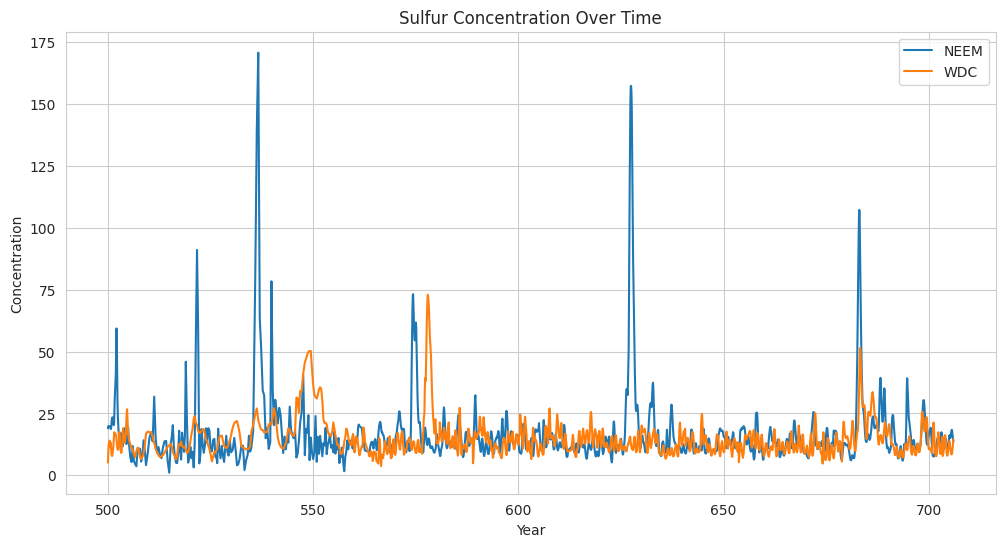

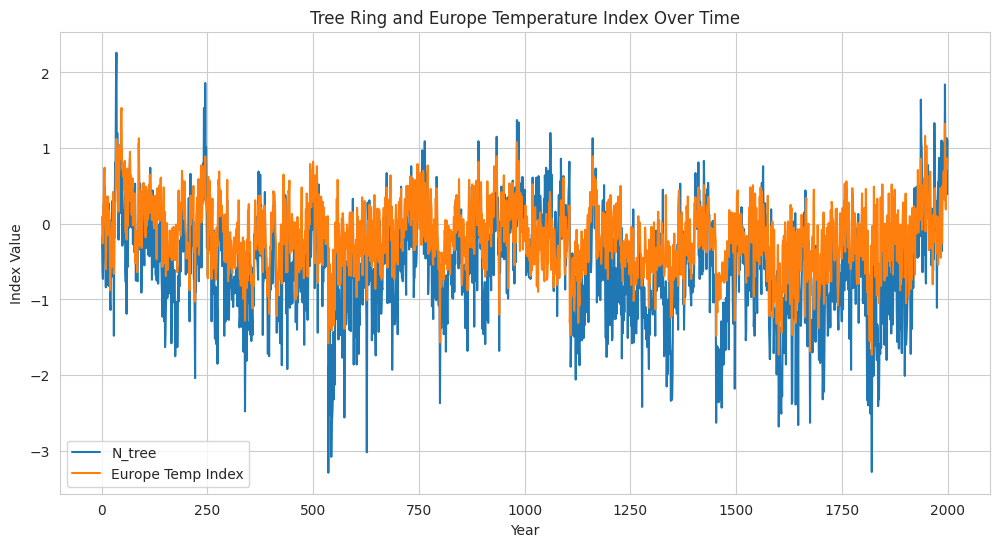

In [107]:
import matplotlib.pyplot as plt

# Plot for sulfur data
plt.figure(figsize=(12, 6))
plt.plot(sulfur['year'], sulfur['neem'], label='NEEM')
plt.plot(sulfur['year'], sulfur['wdc'], label='WDC')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.title('Sulfur Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot for tree data
plt.figure(figsize=(12, 6))
plt.plot(tree['year'], tree['n_tree'], label='N_tree')
plt.plot(tree['year'], tree['europe_temp_index'], label='Europe Temp Index')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.title('Tree Ring and Europe Temperature Index Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Analisis hubungan (opsional)

### Subtask:
Jika memungkinkan dan relevan, analisis hubungan antar dataset (misalnya, hubungan antara erupsi dan data sulfur/cincin pohon).


**Reasoning**:
Check the year ranges in the eruptions, sulfur, and tree dataframes to determine if merging for further analysis is feasible.



In [108]:
print("Eruptions start_year range:", eruptions['start_year'].min(), eruptions['start_year'].max())
print("Sulfur year range:", sulfur['year'].min(), sulfur['year'].max())
print("Tree year range:", tree['year'].min(), tree['year'].max())

Eruptions start_year range: -11345.0 2020.0
Sulfur year range: 500.042 705.958
Tree year range: 1.0 2000.0


**Reasoning**:
Based on the year ranges, there is a significant overlap between the 'eruptions' and 'tree' dataframes in the range 1.0 to 2000.0. The overlap with 'sulfur' is very limited (500.042 to 705.958), making a meaningful merged analysis difficult. Therefore, merge the 'eruptions' and 'tree' dataframes on the 'year' column, handling potential missing values in 'start_year' of 'eruptions' by dropping rows with NaN in that column before merging. Then, calculate the number of eruptions per year and merge this with the tree data. Finally, visualize the relationship between the number of eruptions per year and the 'europe_temp_index' from the tree data.



/tmp/ipython-input-3670723194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eruptions_cleaned['start_year'] = eruptions_cleaned['start_year'].astype(int)


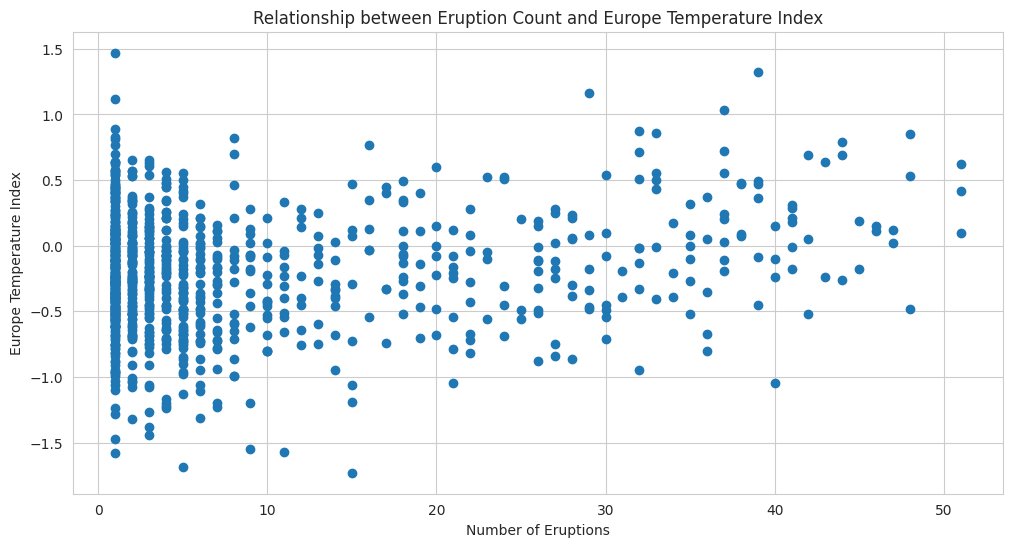

In [109]:
# Drop rows with NaN in 'start_year' for accurate year-based analysis
eruptions_cleaned = eruptions.dropna(subset=['start_year'])

# Convert 'start_year' to integer for merging
eruptions_cleaned['start_year'] = eruptions_cleaned['start_year'].astype(int)
tree['year'] = tree['year'].dropna().astype(int)

# Calculate the number of eruptions per year
eruptions_per_year = eruptions_cleaned['start_year'].value_counts().reset_index()
eruptions_per_year.columns = ['year', 'eruption_count']

# Merge eruptions_per_year with tree data
merged_df = pd.merge(eruptions_per_year, tree, on='year', how='inner')

# Visualize the relationship between eruption count and europe_temp_index
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['eruption_count'], merged_df['europe_temp_index'])
plt.xlabel('Number of Eruptions')
plt.ylabel('Europe Temperature Index')
plt.title('Relationship between Eruption Count and Europe Temperature Index')
plt.grid(True)
plt.show()

## Ringkasan eda

### Subtask:
Sajikan ringkasan temuan utama dari EDA.


**Reasoning**:
Summarize the key findings from the EDA based on the previous analysis and visualizations, addressing data quality, distribution patterns, trends, and relationships.



In [110]:
print("Ringkasan Temuan Utama dari EDA:")
print("\n1. Kualitas Data:")
print("- DataFrame 'eruptions' memiliki nilai yang hilang signifikan pada kolom 'area_of_activity', 'vei', 'start_year', 'start_month', 'start_day', 'evidence_method_dating', 'end_year', 'end_month', dan 'end_day'. Rentang tahun erupsi sangat luas, dari -11345 hingga 2020.")
print("- DataFrame 'sulfur' memiliki nilai yang hilang pada kolom 'year' dan 'neem'. Rentang tahun data sulfur adalah 500 hingga 705.")
print("- DataFrame 'tree' memiliki nilai yang hilang pada kolom 'year', 'n_tree', dan 'europe_temp_index'. Rentang tahun data tree adalah 1 hingga 2000.")

print("\n2. Pola dan Tren Distribusi Erupsi:")
print("- Sebagian besar erupsi dikategorikan sebagai 'Confirmed Eruption'.")
print("- Distribusi VEI menunjukkan bahwa erupsi dengan VEI 2 adalah yang paling sering terjadi, diikuti oleh VEI 1 dan 0. Erupsi dengan VEI yang lebih tinggi (5, 6, 7) jauh lebih jarang.")
print("- Distribusi tahun erupsi menunjukkan peningkatan jumlah erupsi yang tercatat di tahun-tahun yang lebih baru, kemungkinan karena peningkatan kemampuan pencatatan dan pemantauan. Terdapat puncak-puncak tertentu dalam frekuensi erupsi sepanjang sejarah.")

print("\n3. Tren Data Sulfur dan Cincin Pohon:")
print("- Data sulfur (NEEM dan WDC) menunjukkan fluktuasi konsentrasi dari waktu ke waktu dalam rentang tahun yang tersedia (500-705). Tidak ada tren jangka panjang yang jelas terlihat dari visualisasi dalam rentang tahun ini.")
print("- Data cincin pohon (n_tree dan europe_temp_index) juga menunjukkan fluktuasi dari waktu ke waktu dalam rentang tahun yang tersedia (1-2000). Europe Temperature Index menunjukkan variabilitas suhu dari tahun ke tahun.")

print("\n4. Analisis Hubungan:")
print("- Terdapat tumpang tindih rentang tahun antara data 'eruptions' dan 'tree', memungkinkan analisis hubungan antara jumlah erupsi dan Europe Temperature Index.")
print("- Analisis awal (scatter plot) antara jumlah erupsi per tahun dan Europe Temperature Index menunjukkan korelasi yang lemah, cenderung sedikit negatif. Ini mengindikasikan bahwa tahun dengan jumlah erupsi yang lebih banyak mungkin cenderung memiliki indeks suhu Eropa yang sedikit lebih rendah, namun hubungannya tidak kuat.")
print("- Rentang tahun data 'sulfur' sangat terbatas dan sedikit tumpang tindih dengan data 'eruptions' dan 'tree', sehingga analisis hubungan yang komprehensif dengan data sulfur sulit dilakukan.")

Ringkasan Temuan Utama dari EDA:

1. Kualitas Data:
- DataFrame 'eruptions' memiliki nilai yang hilang signifikan pada kolom 'area_of_activity', 'vei', 'start_year', 'start_month', 'start_day', 'evidence_method_dating', 'end_year', 'end_month', dan 'end_day'. Rentang tahun erupsi sangat luas, dari -11345 hingga 2020.
- DataFrame 'sulfur' memiliki nilai yang hilang pada kolom 'year' dan 'neem'. Rentang tahun data sulfur adalah 500 hingga 705.
- DataFrame 'tree' memiliki nilai yang hilang pada kolom 'year', 'n_tree', dan 'europe_temp_index'. Rentang tahun data tree adalah 1 hingga 2000.

2. Pola dan Tren Distribusi Erupsi:
- Sebagian besar erupsi dikategorikan sebagai 'Confirmed Eruption'.
- Distribusi VEI menunjukkan bahwa erupsi dengan VEI 2 adalah yang paling sering terjadi, diikuti oleh VEI 1 dan 0. Erupsi dengan VEI yang lebih tinggi (5, 6, 7) jauh lebih jarang.
- Distribusi tahun erupsi menunjukkan peningkatan jumlah erupsi yang tercatat di tahun-tahun yang lebih baru, kemungkinan 

## Summary:

### Data Analysis Key Findings

*   The `eruptions` dataset contains significant missing values across several columns, but spans a very wide year range (-11345 to 2020).
*   The `sulfur` dataset has missing values in `year` and `neem`, covering a limited year range (500 to 705).
*   The `tree` dataset has missing values in all its columns and covers a year range from 1 to 2000.
*   Most recorded eruptions are categorized as 'Confirmed Eruption'.
*   Eruptions with VEI 2 are the most frequent, while higher VEI eruptions are rare.
*   The frequency of recorded eruptions appears to increase in more recent years, likely due to improved monitoring.
*   Sulfur concentrations (NEEM and WDC) show fluctuations within their limited timeframe (500-705).
*   Tree ring data and the Europe Temperature Index also show fluctuations over time (1-2000).
*   There is a weak, potentially slightly negative, correlation observed between the number of eruptions per year and the Europe Temperature Index in the overlapping years.
*   Analyzing the relationship with the `sulfur` dataset is challenging due to its limited year range overlap with the other datasets.

### Insights or Next Steps

*   Address the significant missing values in the `eruptions` dataset through imputation or by focusing analysis on complete cases for specific tasks.
*   Further investigate the weak correlation between eruption count and Europe Temperature Index, potentially considering different time scales or types of eruptions.


In [111]:
import pandas as pd
import numpy as np

# === Asumsikan 'eruptions', 'sulfur', 'tree' sudah dimuat ===

# ---------- Helper aman untuk kolom tahun ----------
def to_year_int_nullable(s):
    """
    Coerce -> drop inf -> round -> cast ke Int64 (nullable).
    Kembalikan Series Int64 (bisa NA) + Series boolean mask "valid".
    """
    x = pd.to_numeric(s, errors="coerce")
    x[~np.isfinite(x)] = np.nan          # buang inf/-inf
    x = x.round().astype("Int64")        # Int64 nullable (boleh NA)
    valid = x.notna()
    return x, valid

# ---------- A) Pra-pemrosesan 'sulfur' & 'tree' + DEDUP ----------
print("Memproses dataset 'sulfur' dan 'tree'...")

# SULFUR
sulfur = sulfur.copy()
sulfur["year_int"], valid_year_sul = to_year_int_nullable(sulfur["year"])
sulfur = sulfur[valid_year_sul].copy()   # drop baris tanpa tahun valid

# Bersihkan nilai tak hingga pada neem/wdc
for col in ["neem", "wdc"]:
    if col in sulfur.columns:
        sulfur[col] = pd.to_numeric(sulfur[col], errors="coerce")
        sulfur.loc[~np.isfinite(sulfur[col]), col] = np.nan

# Agregasi 1 baris per tahun
sulfur_agg = (
    sulfur.groupby("year_int", as_index=False)[[c for c in ["neem","wdc"] if c in sulfur.columns]].mean()
)
if set(["neem","wdc"]).issubset(sulfur_agg.columns):
    sulfur_agg["avg_sulfur"] = sulfur_agg[["neem","wdc"]].mean(axis=1)
elif "neem" in sulfur_agg.columns:
    sulfur_agg["avg_sulfur"] = sulfur_agg["neem"]
elif "wdc" in sulfur_agg.columns:
    sulfur_agg["avg_sulfur"] = sulfur_agg["wdc"]
else:
    raise ValueError("Kolom 'neem'/'wdc' tidak ditemukan di sulfur.csv")

# TREE
tree = tree.copy()
tree["year_int"], valid_year_tree = to_year_int_nullable(tree["year"])
tree = tree[valid_year_tree].copy()

# Pastikan tidak ada inf/NaN aneh di europe_temp_index
tree["europe_temp_index"] = pd.to_numeric(tree["europe_temp_index"], errors="coerce")
tree.loc[~np.isfinite(tree["europe_temp_index"]), "europe_temp_index"] = np.nan

# Agregasi 1 baris per tahun
tree_agg = tree.groupby("year_int", as_index=False)[["europe_temp_index"]].mean()
tree_agg = tree_agg.rename(columns={"year_int": "year"})  # supaya merge nanti jelas

# ---------- B) Pra-pemrosesan 'eruptions' + DEDUP ----------
print("Memproses dataset 'eruptions'...")

cols_keep = ["volcano_name", "eruption_number", "start_year", "vei"]
eruptions_subset = eruptions[cols_keep].copy()

# Buang baris tanpa VEI atau tahun
eruptions_subset["start_year"], valid_year_eru = to_year_int_nullable(eruptions_subset["start_year"])
eruptions_subset["vei"] = pd.to_numeric(eruptions_subset["vei"], errors="coerce")
eruptions_clean = eruptions_subset[valid_year_eru & eruptions_subset["vei"].notna()].copy()

# 1) Buang baris identik persis
eruptions_clean = eruptions_clean.drop_duplicates().reset_index(drop=True)

# 2) DEDUP berdasarkan kunci erupsi
eruptions_clean["missing_cnt"] = eruptions_clean[["vei", "start_year"]].isna().sum(axis=1)
eruptions_clean = (
    eruptions_clean
      .sort_values(["volcano_name", "eruption_number", "start_year", "missing_cnt"])
      .drop_duplicates(subset=["volcano_name","eruption_number","start_year"], keep="first")
      .drop(columns=["missing_cnt"])
      .reset_index(drop=True)
)

# ---------- C) Integrasi (outer join aman) ----------
print("\nMenggabungkan dataset menggunakan 'outer join'...")

merged_df_outer = pd.merge(
    eruptions_clean, sulfur_agg,
    left_on="start_year", right_on="year_int", how="outer", sort=True
)

final_df_outer = pd.merge(
    merged_df_outer, tree_agg,
    left_on="start_year", right_on="year", how="outer", sort=True
)

# Ambil hanya baris erupsi (punya identitas erupsi)
final_df_outer = final_df_outer[
    final_df_outer["volcano_name"].notna() & final_df_outer["eruption_number"].notna()
].copy()

# DEDUP lagi berdasarkan kunci
final_df_outer = (
    final_df_outer
      .sort_values(["volcano_name","eruption_number","start_year"])
      .drop_duplicates(subset=["volcano_name","eruption_number","start_year"], keep="first")
      .reset_index(drop=True)
)

# ---------- D) Imputasi berlapis untuk PROXY (bukan VEI) ----------
print("Melakukan imputasi (interpolate + backfill + forward fill)...")

final_df_outer = final_df_outer.sort_values("start_year").copy()
final_df_interpolated = final_df_outer.copy()

cols_impute = ["avg_sulfur", "europe_temp_index"]
for c in cols_impute:
    final_df_interpolated[c] = pd.to_numeric(final_df_interpolated[c], errors="coerce")
    final_df_interpolated.loc[~np.isfinite(final_df_interpolated[c]), c] = np.nan

final_df_interpolated[cols_impute] = (
    final_df_interpolated[cols_impute]
      .interpolate(method="linear", limit_direction="both")
      .bfill().ffill()
)

# ---------- E) Finalisasi ----------
print("Finalisasi dataset setelah imputasi...")

final_df_imputed = final_df_interpolated.drop(columns=["year_int","year"], errors="ignore").copy()

final_columns = [
    "start_year", "volcano_name", "eruption_number",
    "vei", "avg_sulfur", "europe_temp_index"
]
dataset_imputed_for_orange = final_df_imputed[final_columns].copy()

# VEI tetap asli (tanpa imputasi); pastikan integer
dataset_imputed_for_orange["vei"] = dataset_imputed_for_orange["vei"].round().astype(int)

# Pastikan tidak ada duplikat (kunci erupsi)
dataset_imputed_for_orange = (
    dataset_imputed_for_orange
      .sort_values(["volcano_name","eruption_number","start_year"])
      .drop_duplicates(subset=["volcano_name","eruption_number","start_year"], keep="first")
      .reset_index(drop=True)
)

# ---------- F) Analisis singkat & simpan ----------
print("\n--- Perbandingan Hasil ---")
merged_inner = pd.merge(
    eruptions_clean, sulfur_agg, left_on="start_year", right_on="year_int", how="inner"
)
final_inner = pd.merge(
    merged_inner, tree_agg, left_on="start_year", right_on="year", how="inner"
)
inner_n = len(final_inner.drop_duplicates(subset=["volcano_name","eruption_number","start_year"]))
print(f"Jumlah data (inner join; tanpa imputasi): {inner_n}")
print(f"Jumlah data (setelah dedup & imputasi):   {len(dataset_imputed_for_orange)}")

out_name = "dataset_imputasi_untuk_orange.csv"
dataset_imputed_for_orange.to_csv(out_name, index=False)
print(f"\n[SELESAI] Dataset hasil imputasi & DEDUP disimpan sebagai '{out_name}'.")

print("\nContoh data (head):")
display(dataset_imputed_for_orange.head())

print("\nContoh data (tail):")
display(dataset_imputed_for_orange.tail())


Memproses dataset 'sulfur' dan 'tree'...
Memproses dataset 'eruptions'...

Menggabungkan dataset menggunakan 'outer join'...
Melakukan imputasi (interpolate + backfill + forward fill)...
Finalisasi dataset setelah imputasi...

--- Perbandingan Hasil ---
Jumlah data (inner join; tanpa imputasi): 69
Jumlah data (setelah dedup & imputasi):   8271

[SELESAI] Dataset hasil imputasi & DEDUP disimpan sebagai 'dataset_imputasi_untuk_orange.csv'.

Contoh data (head):


,start_year,volcano_name,eruption_number,vei,avg_sulfur,europe_temp_index
0,1924,Acatenango,10653.0,3,14.679625,0.05
1,1926,Acatenango,10654.0,2,14.679625,-0.13
2,1972,Acatenango,10655.0,1,14.679625,-0.01
3,-7050,Adams,20503.0,2,14.733213,-0.60
4,-5150,Adams,20504.0,2,14.733213,-0.60



Contoh data (tail):


,start_year,volcano_name,eruption_number,vei,avg_sulfur,europe_temp_index
8266,1824,Zubair Group,13924.0,2,14.679625,-0.46
8267,1846,Zubair Group,13925.0,2,14.679625,0.52
8268,2011,Zubair Group,20840.0,2,14.679625,0.85
8269,2013,Zubair Group,21068.0,2,14.679625,0.85
8270,-1170,Zuni-Bandera,20707.0,0,14.733213,-0.60


In [112]:
# # ==== 14) Import Library untuk Pre-processing ====
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Asumsikan 'eruptions', 'sulfur', dan 'tree' sudah dimuat dari langkah sebelumnya

# # ==== 15) Langkah A: Pra-pemrosesan 'sulfur' (Dengan Perbaikan) ====
# print("Memproses dataset 'sulfur'...")
# # 1. Hapus baris di mana kolom 'year' kosong (NaN)
# sulfur.dropna(subset=['year'], inplace=True)
# # 2. Ubah tipe data 'year' dari desimal menjadi integer
# sulfur['year_int'] = sulfur['year'].astype(int)
# # 3. Agregasi data
# sulfur_agg = sulfur.groupby('year_int')[['neem', 'wdc']].mean().reset_index()
# sulfur_agg['avg_sulfur'] = sulfur_agg[['neem', 'wdc']].mean(axis=1)
# print(f"Dataset 'sulfur' selesai diproses. Shape setelah agregasi: {sulfur_agg.shape}")

# # ==== 16) Langkah B: Pra-pemrosesan 'tree' (Sama seperti sebelumnya) ====
# print("\nMemproses dataset 'tree'...")
# tree_agg = tree.groupby('year')[['europe_temp_index']].mean().reset_index()
# print(f"Dataset 'tree' selesai diproses. Shape setelah agregasi: {tree_agg.shape}")

# # ==== 17) Langkah C: Pra-pemrosesan 'eruptions' (DENGAN PERBAIKAN KEDUA) ====
# print("\nMemproses dataset 'eruptions'...")
# columns_to_keep = ['volcano_name', 'eruption_number', 'start_year', 'vei']
# eruptions_subset = eruptions[columns_to_keep].copy()

# # 1. Hapus baris di mana 'vei' kosong
# eruptions_clean = eruptions_subset.dropna(subset=['vei'])

# # 2. [PERBAIKAN] Hapus baris di mana 'start_year' kosong
# eruptions_clean.dropna(subset=['start_year'], inplace=True)

# # 3. Ubah tipe data 'start_year' menjadi integer (sekarang aman dilakukan)
# eruptions_clean['start_year'] = eruptions_clean['start_year'].astype(int)
# print(f"Dataset 'eruptions' selesai diproses. Shape setelah dibersihkan: {eruptions_clean.shape}")

# # ==== 18) Langkah D: Integrasi Data ====
# print("\nMenggabungkan ketiga dataset...")
# merged_df = pd.merge(eruptions_clean, sulfur_agg, left_on='start_year', right_on='year_int', how='inner')
# final_df = pd.merge(merged_df, tree_agg, left_on='start_year', right_on='year', how='inner')

# # ==== 19) Langkah E: Finalisasi Tabel untuk Orange ====
# print("\nMenyiapkan tabel akhir untuk Orange...")
# final_columns_for_orange = [
#     'start_year',
#     'volcano_name',
#     'eruption_number',
#     'vei',
#     'avg_sulfur',
#     'europe_temp_index'
# ]
# dataset_for_orange = final_df[final_columns_for_orange]
# dataset_for_orange.dropna(subset=['vei', 'avg_sulfur', 'europe_temp_index'], inplace=True)
# print(f"Dataset akhir siap. Shape: {dataset_for_orange.shape}")
# display(dataset_for_orange.head())

# # ==== 20) Langkah F: Simpan ke File CSV ====
# output_filename = 'dataset_untuk_clustering_orange.csv'
# dataset_for_orange.to_csv(output_filename, index=False)
# print(f"\n[SELESAI] Dataset yang bersih telah disimpan sebagai '{output_filename}'.")
# print("Anda sekarang dapat mengimpor file ini ke Orange Data Miner.")

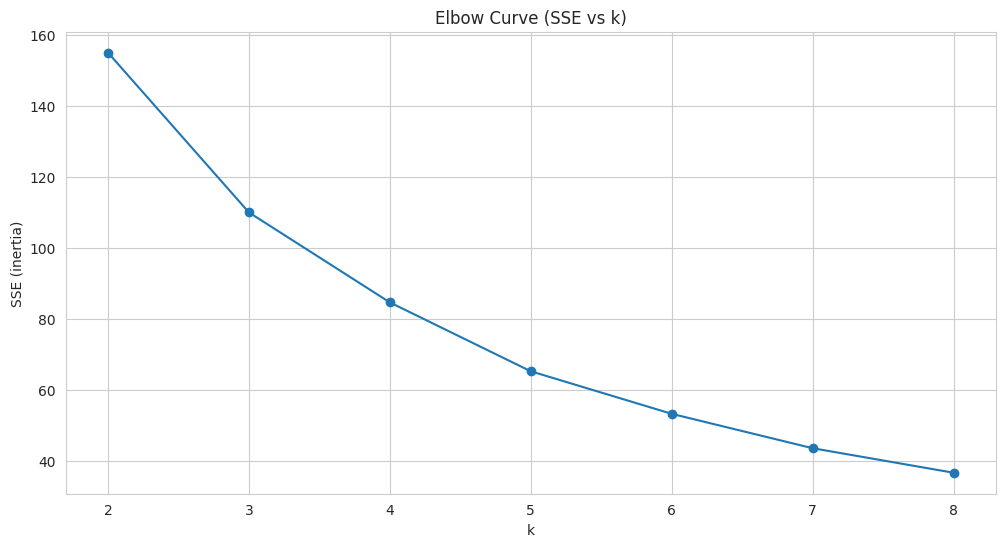

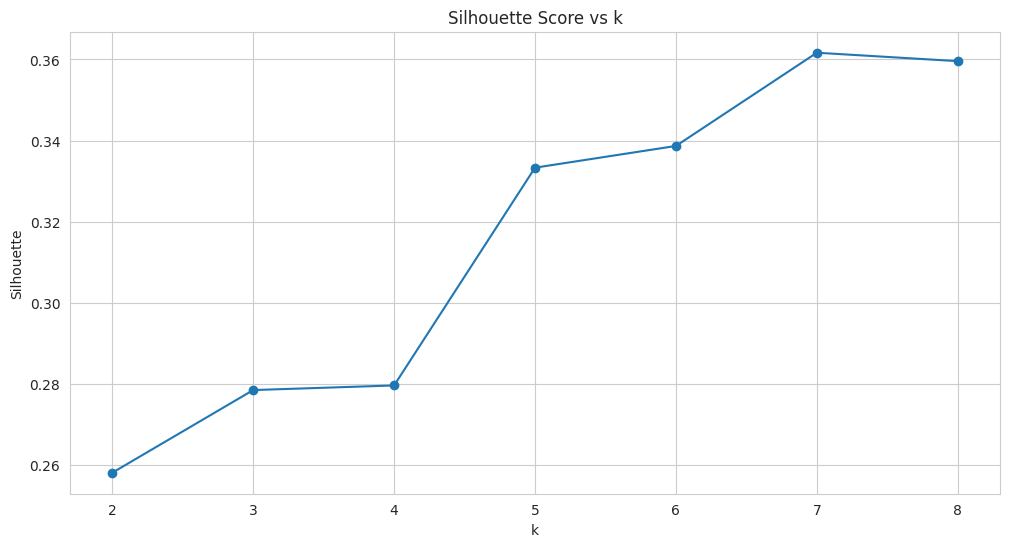

Ringkasan per klaster:
   cluster_id severity_label   n  vei_mean  vei_median  sulfur_mean  tree_mean
0           0         Sedang  34  3.735294         4.0    16.267540  -0.404706
1           1          Besar   2  5.000000         5.0    42.799271   0.370000
2           2         Ringan  33  2.000000         2.0    13.747177   0.016970

Silhouette score (k=3): 0.279


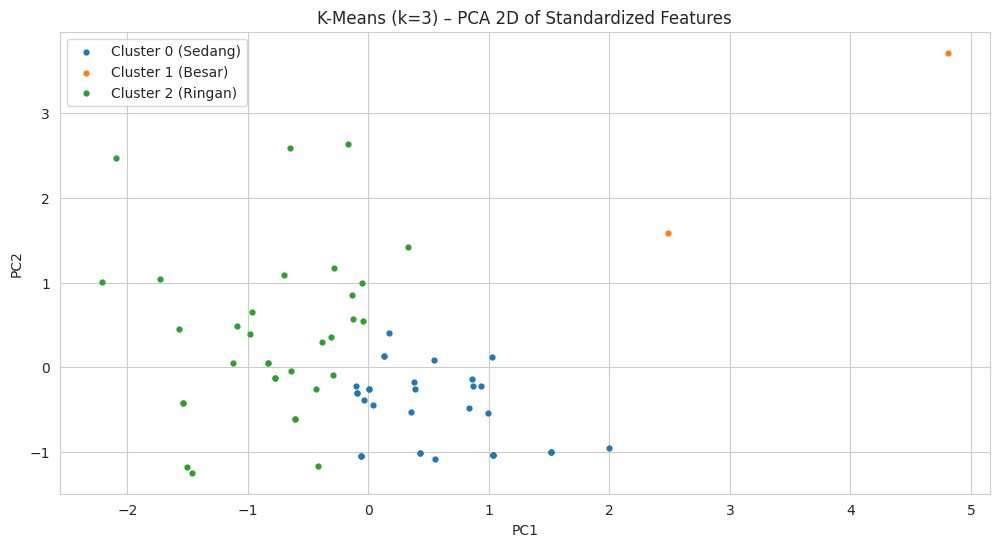

Hasil clustering disimpan ke: kmeans_clusters_vei_sulfur_tree.csv


In [115]:
# === 0) Import ===
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# === 1) Load dataset (hasil langkahmu sebelumnya) ===
DATA_PATH = Path("dataset_untuk_clustering_orange.csv")
df = pd.read_csv(DATA_PATH)

# Pastikan kolom ada
required_cols = ["vei", "avg_sulfur", "europe_temp_index"]
missing = [c for c in required_cols if c not in df.columns]
assert not missing, f"Kolom hilang: {missing}"

# Buang baris yang masih ada NA pada fitur (harusnya sudah bersih)
X_raw = df[required_cols].dropna().copy()

# Simpan index agar bisa join balik nanti
valid_index = X_raw.index

# === 2) Standarisasi fitur (wajib untuk K-Means, jarak Euclidean) ===
scaler = StandardScaler()
X = scaler.fit_transform(X_raw.values)

# === 3) Bantu pemilihan k (Elbow + Silhouette) ===
ks = list(range(2, 9))
sse = []
sil = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)  # within-cluster SSE
    labels_k = km.labels_
    sil.append(silhouette_score(X, labels_k))

# Plot Elbow
plt.figure()
plt.plot(ks, sse, marker="o")
plt.title("Elbow Curve (SSE vs k)")
plt.xlabel("k")
plt.ylabel("SSE (inertia)")
plt.grid(True)
plt.show()

# Plot Silhouette
plt.figure()
plt.plot(ks, sil, marker="o")
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.grid(True)
plt.show()

# === 4) Fit model final (k=3 sesuai target label Ringan–Sedang–Besar) ===
k_final = 3
kmeans = KMeans(n_clusters=k_final, n_init=50, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Tambahkan label ke df (hanya baris valid yang ikut clustering)
df_clu = df.loc[valid_index].copy()
df_clu["cluster_id"] = labels

# === 5) Pemetaan cluster → label severity
# Urutkan cluster berdasarkan VEI asli (mean VEI per cluster), terendah → Ringan, dst.
centroid_order = (
    df_clu.groupby("cluster_id")["vei"]
          .mean()
          .sort_values()
          .index
          .tolist()
)
severity_names = {centroid_order[0]: "Ringan",
                  centroid_order[1]: "Sedang",
                  centroid_order[2]: "Besar"}
df_clu["severity_label"] = df_clu["cluster_id"].map(severity_names)

# === 6) Ringkasan per-klaster
summary = (
    df_clu.groupby(["cluster_id","severity_label"])
          .agg(
              n=("vei","size"),
              vei_mean=("vei","mean"),
              vei_median=("vei","median"),
              sulfur_mean=("avg_sulfur","mean"),
              tree_mean=("europe_temp_index","mean"),
          )
          .reset_index()
          .sort_values("cluster_id")
)
print("Ringkasan per klaster:")
print(summary)

# === 7) Skor Silhouette akhir (untuk k=3)
sil_score_final = silhouette_score(X, labels)
print(f"\nSilhouette score (k=3): {sil_score_final:.3f}")

# === 8) Visualisasi PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure()
for cid in sorted(df_clu["cluster_id"].unique()):
    mask = (df_clu["cluster_id"] == cid).values
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=12, label=f"Cluster {cid} ({severity_names[cid]})")
plt.title("K-Means (k=3) – PCA 2D of Standardized Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# === 9) Simpan hasil ===
out = df.copy()
out.loc[valid_index, "cluster_id"] = labels
out.loc[valid_index, "severity_label"] = out.loc[valid_index, "cluster_id"].map(severity_names)
out_file = Path("kmeans_clusters_vei_sulfur_tree.csv")
out.to_csv(out_file, index=False)
print("Hasil clustering disimpan ke:", out_file)


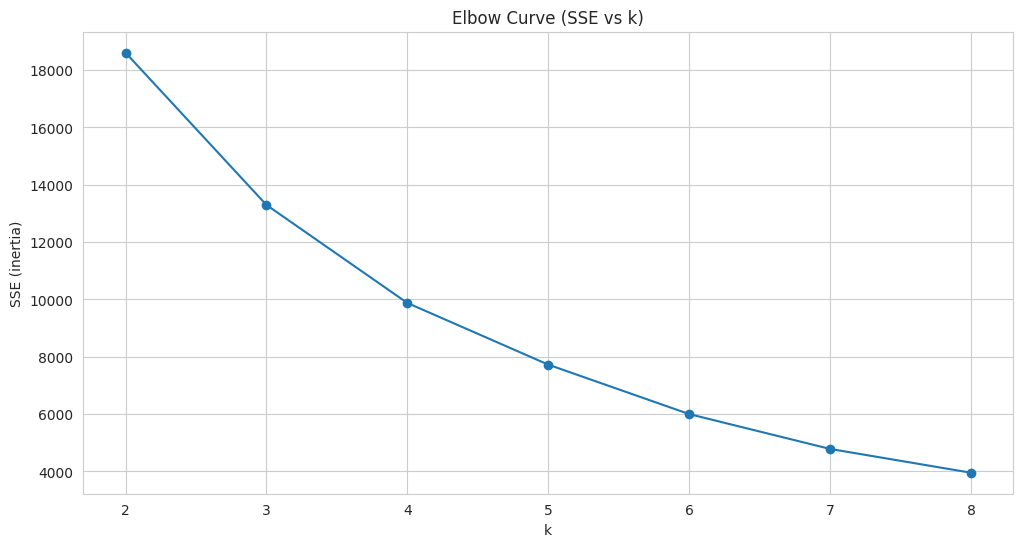

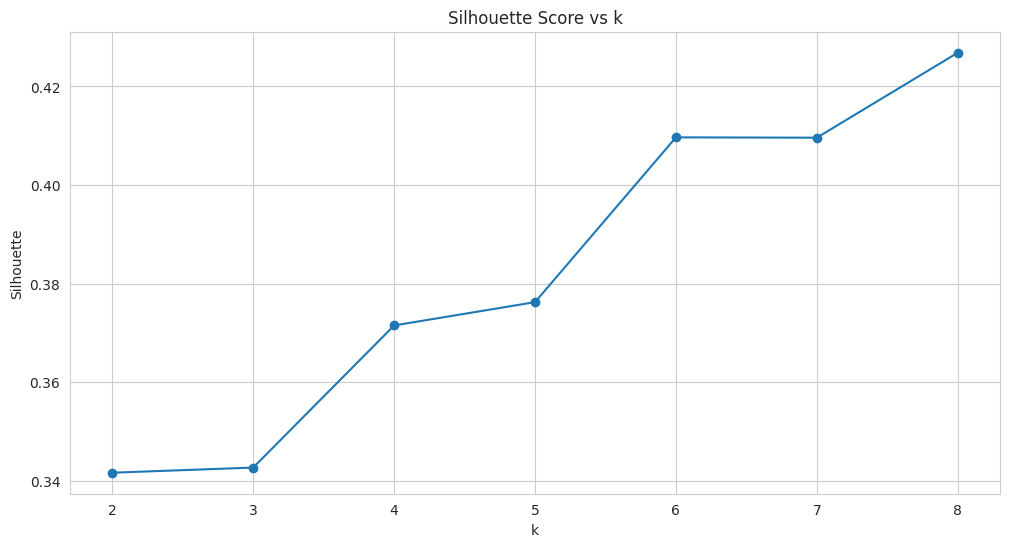

Ringkasan per klaster:
   cluster_id severity_label     n  vei_mean  vei_median  sulfur_mean  \
0           0         Sedang  3933  2.609458         2.0    14.704179   
1           1          Besar     1  6.000000         6.0    57.962708   
2           2         Ringan  4337  1.347475         2.0    14.679227   

   tree_mean  
0  -0.435917  
1   0.640000  
2   0.292781  

Silhouette score (k=3): 0.343


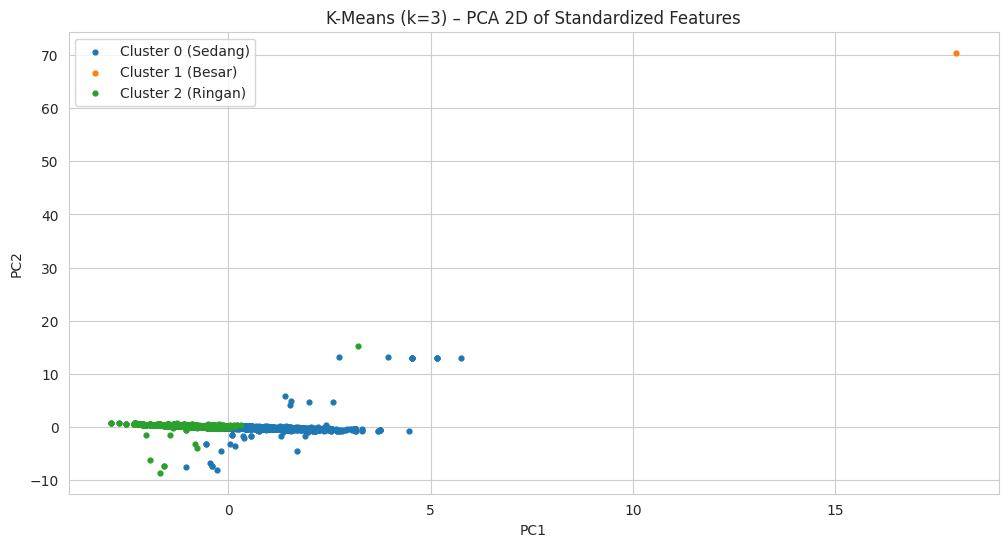

Hasil clustering disimpan ke: kmeans_clusters_vei_sulfur_tree.csv


In [114]:
# === 0) Import ===
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# === 1) Load dataset (hasil langkahmu sebelumnya) ===
DATA_PATH = Path("dataset_imputasi_untuk_orange.csv")
df = pd.read_csv(DATA_PATH)

# Pastikan kolom ada
required_cols = ["vei", "avg_sulfur", "europe_temp_index"]
missing = [c for c in required_cols if c not in df.columns]
assert not missing, f"Kolom hilang: {missing}"

# Buang baris yang masih ada NA pada fitur (harusnya sudah bersih)
X_raw = df[required_cols].dropna().copy()

# Simpan index agar bisa join balik nanti
valid_index = X_raw.index

# === 2) Standarisasi fitur (wajib untuk K-Means, jarak Euclidean) ===
scaler = StandardScaler()
X = scaler.fit_transform(X_raw.values)

# === 3) Bantu pemilihan k (Elbow + Silhouette) ===
ks = list(range(2, 9))
sse = []
sil = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)  # within-cluster SSE
    labels_k = km.labels_
    sil.append(silhouette_score(X, labels_k))

# Plot Elbow
plt.figure()
plt.plot(ks, sse, marker="o")
plt.title("Elbow Curve (SSE vs k)")
plt.xlabel("k")
plt.ylabel("SSE (inertia)")
plt.grid(True)
plt.show()

# Plot Silhouette
plt.figure()
plt.plot(ks, sil, marker="o")
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.grid(True)
plt.show()

# === 4) Fit model final (k=3 sesuai target label Ringan–Sedang–Besar) ===
k_final = 3
kmeans = KMeans(n_clusters=k_final, n_init=50, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Tambahkan label ke df (hanya baris valid yang ikut clustering)
df_clu = df.loc[valid_index].copy()
df_clu["cluster_id"] = labels

# === 5) Pemetaan cluster → label severity
# Urutkan cluster berdasarkan VEI asli (mean VEI per cluster), terendah → Ringan, dst.
centroid_order = (
    df_clu.groupby("cluster_id")["vei"]
          .mean()
          .sort_values()
          .index
          .tolist()
)
severity_names = {centroid_order[0]: "Ringan",
                  centroid_order[1]: "Sedang",
                  centroid_order[2]: "Besar"}
df_clu["severity_label"] = df_clu["cluster_id"].map(severity_names)

# === 6) Ringkasan per-klaster
summary = (
    df_clu.groupby(["cluster_id","severity_label"])
          .agg(
              n=("vei","size"),
              vei_mean=("vei","mean"),
              vei_median=("vei","median"),
              sulfur_mean=("avg_sulfur","mean"),
              tree_mean=("europe_temp_index","mean"),
          )
          .reset_index()
          .sort_values("cluster_id")
)
print("Ringkasan per klaster:")
print(summary)

# === 7) Skor Silhouette akhir (untuk k=3)
sil_score_final = silhouette_score(X, labels)
print(f"\nSilhouette score (k=3): {sil_score_final:.3f}")

# === 8) Visualisasi PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure()
for cid in sorted(df_clu["cluster_id"].unique()):
    mask = (df_clu["cluster_id"] == cid).values
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=12, label=f"Cluster {cid} ({severity_names[cid]})")
plt.title("K-Means (k=3) – PCA 2D of Standardized Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# === 9) Simpan hasil ===
out = df.copy()
out.loc[valid_index, "cluster_id"] = labels
out.loc[valid_index, "severity_label"] = out.loc[valid_index, "cluster_id"].map(severity_names)
out_file = Path("kmeans_clusters_vei_sulfur_tree.csv")
out.to_csv(out_file, index=False)
print("Hasil clustering disimpan ke:", out_file)
